In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress


In [107]:
# File to Load (Remember to Change These)
file= "case_demographics_ethnicity.csv"

# Read Purchasing File and store into Pandas data frame
df= pd.read_csv(file)


In [108]:
df

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
0,Latino,5276,35.99,170,28.38,38.9,4/13/2020
1,Latino,5910,37.18,203,29.72,38.9,4/14/2020
2,Latino,6433,37.8,226,29.7,38.9,4/15/2020
3,Latino,7013,38.51,254,29.85,38.9,4/16/2020
4,Latino,7627,39.41,281,30.58,38.9,4/17/2020
...,...,...,...,...,...,...,...
5086,Multi-Race,40752,1.5,626,1.3,2.2,2/24/2021
5087,American Indian or Alaska Native,8770,0.3,167,0.3,0.5,2/24/2021
5088,Native Hawaiian and other Pacific Islander,15097,0.6,302,0.6,0.3,2/24/2021
5089,Other,306466,11.5,1084,2.2,0,2/24/2021


In [109]:
df.count()

race_ethnicity           5091
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [110]:
#Dropping lines with no data

Ethnicity_df=df.dropna(how="any")
Ethnicity_df.count()

race_ethnicity           5089
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [111]:
Ethnicity_df.nunique()


race_ethnicity             11
cases                    2461
case_percentage           402
deaths                   1431
death_percentage          380
percent_ca_population       9
date                      319
dtype: int64

In [112]:
Ethnicity_df["race_ethnicity"].value_counts()

White                                         636
Latino                                        636
Other                                         636
American Indian or Alaska Native              636
Black                                         636
Asian                                         636
Multi-Race                                    538
Native Hawaiian and other Pacific Islander    538
Multiracial                                    98
Native Hawaiian or Pacific Islander            98
race_ethnicity                                  1
Name: race_ethnicity, dtype: int64

In [113]:
Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="race_ethnicity", : ]

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
2545,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date


In [114]:
#Cleaning up Ethnicity colmn 

Ethnicity_df=Ethnicity_df.loc[(Ethnicity_df["race_ethnicity"]!="race_ethnicity")]
Ethnicity_df["race_ethnicity"].value_counts()

White                                         636
Latino                                        636
Other                                         636
American Indian or Alaska Native              636
Black                                         636
Asian                                         636
Multi-Race                                    538
Native Hawaiian and other Pacific Islander    538
Multiracial                                    98
Native Hawaiian or Pacific Islander            98
Name: race_ethnicity, dtype: int64

In [125]:
#Tail end represents sum of statistics for ethnicities

new_df=Ethnicity_df.tail(8)
new_df

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
5082,Latino,1476643,55.2,22893,46.2,38.9,2/24/2021
5083,White,535706,20,15648,31.6,36.6,2/24/2021
5084,Asian,182235,6.8,5752,11.6,15.4,2/24/2021
5085,Black,108739,4.1,3089,6.2,6,2/24/2021
5086,Multi-Race,40752,1.5,626,1.3,2.2,2/24/2021
5087,American Indian or Alaska Native,8770,0.3,167,0.3,0.5,2/24/2021
5088,Native Hawaiian and other Pacific Islander,15097,0.6,302,0.6,0.3,2/24/2021
5089,Other,306466,11.5,1084,2.2,0,2/24/2021


In [116]:
# blah=Ethnicity_df["race_ethnicity"]
# Ethnicity_df["cases"].astype("float").sum()

In [129]:
Pacific_Islander=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Native Hawaiian or Pacific Islander"]
pacific_df=Pacific_Islander.tail(1)


,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
2835,Native Hawaiian or Pacific Islander,617,0.8,29,0.7,0.3,5/31/2020


In [130]:
Multiracial=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Multiracial"]
multi_df=Multiracial.tail(1)


,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
2818,Multiracial,618,0.8,26,0.6,2.2,5/31/2020


In [142]:
#creating list for new data frame.
#combining multi-race, multi racial and other
#combinging Native Hawaiian or Pacific Islander,Native Hawaiian and other Pacific Islander

race_ethnicity=["Latino","White","Asian","Black","Multiracial","Native Hawaiian or Pacific Islander","American Indian or Alaska Native"]
cases=[1476643,535706,182235,108739,(40752+306466+618),(617+15097),8770]
Deaths=[22893,15648,5752,3089,(626+1084+26),(302+29),167]

Ethnic_df=pd.DataFrame({"Ethnicities":race_ethnicity,
                       "Cases":cases,
                       "Deaths":Deaths})

Ethnic_df

,Ethnicities,Cases,Deaths
0,Latino,1476643,22893
1,White,535706,15648
2,Asian,182235,5752
3,Black,108739,3089
4,Multiracial,347836,1736
5,Native Hawaiian or Pacific Islander,15714,331
6,American Indian or Alaska Native,8770,167


In [144]:
Ethnic_df.describe()

,Cases,Deaths
count,7.000000e+00,7.000000
mean,3.822347e+05,7088.000000
std,5.181826e+05,8784.927585
min,8.770000e+03,167.000000
25%,6.222650e+04,1033.500000
50%,1.822350e+05,3089.000000
75%,4.417710e+05,10700.000000
max,1.476643e+06,22893.000000


Text(0.5, 1.0, 'Percentage of Cases for Genders impacted by COVID in California')

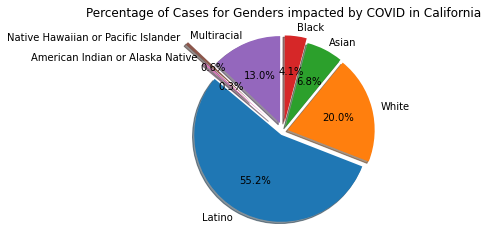

In [199]:
#Pie chart of the percentage(%) of genders impacted in California 
sizes=Ethnic_df["Cases"]

labels=Ethnic_df["Ethnicities"].unique()

explode= (0.05,0.05,0.05,0.1,0.1,0.5,0.2)

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Cases for Genders impacted by COVID in California")

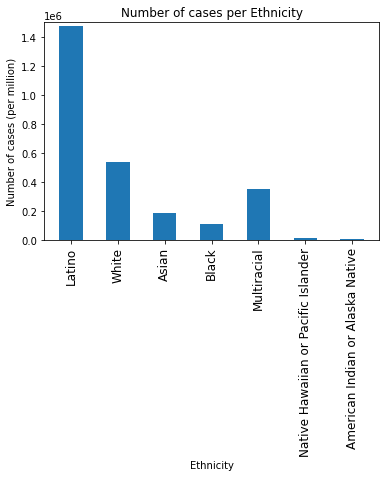

In [158]:
Ethincities = Ethnic_df["Ethnicities"]
Cases_load = Ethnic_df["Cases"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of cases (per million)")
plt.xlabel("Ethnicity")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Ethincities, Cases_load, width)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.ylim([0,1500000])
plt.show()

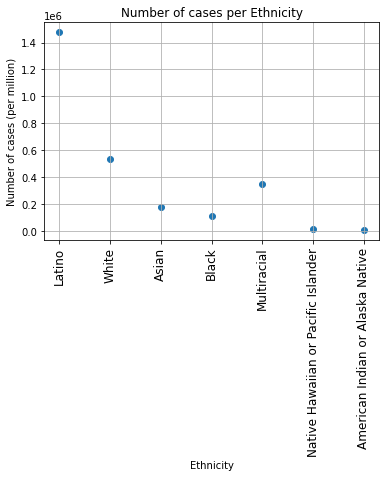

In [163]:
Ethincities = Ethnic_df["Ethnicities"]
Cases_load = Ethnic_df["Cases"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of cases (per million)")
plt.xlabel("Ethnicity")
plt.xticks(rotation=90)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.scatter(Ethincities, Cases_load)
plt.grid(True)
plt.show()

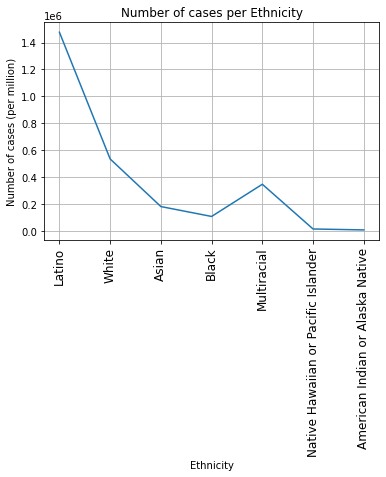

In [171]:
Ethincities = Ethnic_df["Ethnicities"]
Cases_load = Ethnic_df["Cases"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of cases (per million)")
plt.xlabel("Ethnicity")
plt.xticks(rotation=90)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.plot(Ethincities, Cases_load)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Percentage of Deaths for Ethnicities impacted by COVID in California')

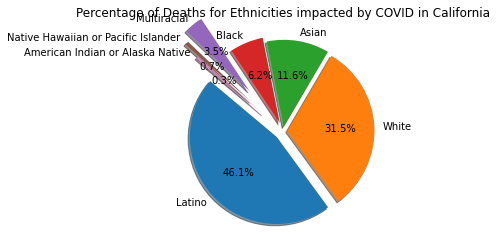

In [198]:
#Pie chart of the percentage(%) of genders impacted in California 
size=Ethnic_df["Deaths"]

label=Ethnic_df["Ethnicities"].unique()

explode= (0.1,0.05,0.05,0.1,0.6,0.5,0.3)

plt.pie(size, labels=label,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Deaths for Ethnicities impacted by COVID in California")

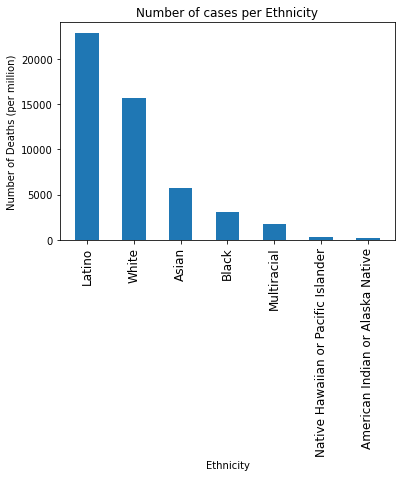

In [173]:
Ethincities_deaths = Ethnic_df["Ethnicities"]
Number_deaths = Ethnic_df["Deaths"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of Deaths (per million)")
plt.xlabel("Ethnicity")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Ethincities_deaths, Number_deaths, width)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.show()

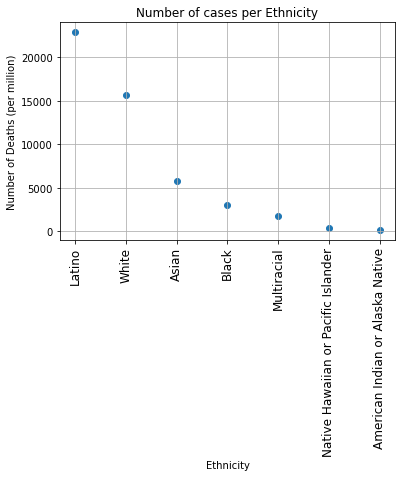

In [181]:
Ethincities_deaths = Ethnic_df["Ethnicities"]
Number_deaths = Ethnic_df["Deaths"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of Deaths (per million)")
plt.xlabel("Ethnicity")
width = 0.5 
plt.xticks(rotation=90)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.scatter(Ethincities_deaths, Number_deaths)
plt.grid(True)
plt.show()

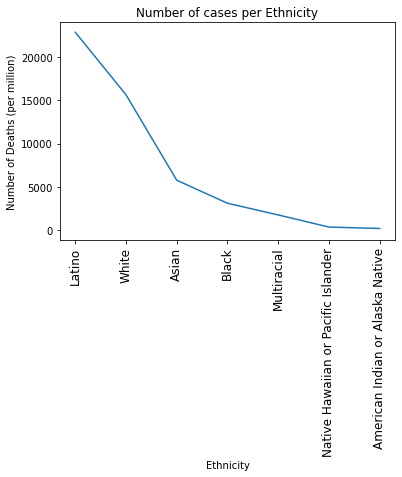

In [174]:
Ethincities_deaths = Ethnic_df["Ethnicities"]
Number_deaths = Ethnic_df["Deaths"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of Deaths (per million)")
plt.xlabel("Ethnicity")
width = 0.5 
plt.xticks(rotation=90)
plt.plot(Ethincities_deaths, Number_deaths, width)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.show()

In [178]:
#Latino Cases Per month 

Latino=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Latino"]
Latino_April=Latino.iloc[0:18, 0:7]
Latino_April.head()

Latino_May=Latino.iloc[18:49, 0:7]
Latino_June=Latino.iloc[49:79, 0:7]
Latino_July=Latino.iloc[79:111, 0:7]
Latino_August=Latino.iloc[111:141, 0:7]
Latino_September=Latino.iloc[141:171, 0:7]
Latino_October=Latino.iloc[171:202, 0:7]
Latino_November=Latino.iloc[202:232, 0:7]
Latino_December=Latino.iloc[232:263, 0:7]
Latino_January=Latino.iloc[263:294, 0:7]
Latino_February=Latino.iloc[294:318, 0:7]


In [39]:
#Other cases per month 

Other=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Other"]
Other_April=Other.iloc[0:18, 0:7]
Other_May=Other.iloc[18:49, 0:7]
Other_June=Other.iloc[49:79, 0:7]
Other_July=Other.iloc[79:111, 0:7]
Other_August=Other.iloc[111:141, 0:7]
Other_September=Other.iloc[141:171, 0:7]
Other_October=Other.iloc[171:202, 0:7]
Other_November=Other.iloc[202:232, 0:7]
Other_December=Other.iloc[232:263, 0:7]
Other_January=Other.iloc[263:294, 0:7]
Other_February=Other.iloc[294:318, 0:7]

In [40]:
#American Indian or Alaska Native  cases per month 

Idian_Alaska=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="American Indian or Alaska Native "]
Idian_Alaska_April=Idian_Alaska.iloc[0:18, 0:7]
Idian_Alaska_May=Idian_Alaska.iloc[18:49, 0:7]
Idian_Alaska_June=Idian_Alaska.iloc[49:79, 0:7]
Idian_Alaska_July=Idian_Alaska.iloc[79:111, 0:7]
Idian_Alaska_August=Idian_Alaska.iloc[111:141, 0:7]
Idian_Alaska_September=Idian_Alaska.iloc[141:171, 0:7]
Idian_Alaska_October=Idian_Alaska.iloc[171:202, 0:7]
Idian_Alaska_November=Idian_Alaska.iloc[202:232, 0:7]
Idian_Alaska_December=Idian_Alaska.iloc[232:263, 0:7]
Idian_Alaska_January=Idian_Alaska.iloc[263:294, 0:7]
Idian_Alaska_February=Idian_Alaska.iloc[294:318, 0:7]                              

In [64]:
#Black cases per month 

Black=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Black"]
Black_April=Black.iloc[0:18, 0:7]
Black_May=Black.iloc[18:49, 0:7]
Black_June=Black.iloc[49:79, 0:7]
Black_July=Black.iloc[79:111, 0:7]
Black_August=Black.iloc[111:141, 0:7]
Black_September=Black.iloc[141:171, 0:7]
Black_October=Black.iloc[171:202, 0:7]
Black_November=Black.iloc[202:232, 0:7]
Black_December=Black.iloc[232:263, 0:7]
Black_January=Black.iloc[263:294, 0:7]
Black_February=Black.iloc[294:318, 0:7]



In [42]:
#Asian cases per month 

Asian=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Asian"]
Asian_April=Asian.iloc[0:18, 0:7]
Asian_May=Asian.iloc[18:49, 0:7]
Asian_June=Asian.iloc[49:79, 0:7]
Asian_July=Asian.iloc[79:111, 0:7]
Asian_August=Asian.iloc[111:141, 0:7]
Asian_September=Asian.iloc[141:171, 0:7]
Asian_October=Asian.iloc[171:202, 0:7]
Asian_November=Asian.iloc[202:232, 0:7]
Asian_December=Asian.iloc[232:263, 0:7]
Asian_January=Asian.iloc[263:294, 0:7]
Asian_February=Asian.iloc[294:318, 0:7]

In [43]:
#Multi-Race cases per month 

Multi_Race=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Multi-Race"]
Multi_Race_April=Multi_Race.iloc[0:18, 0:7]
Multi_Race_May=Multi_Race.iloc[18:49, 0:7]
Multi_Race_June=Multi_Race.iloc[49:79, 0:7]
Multi_Race_July=Multi_Race.iloc[79:111, 0:7]
Multi_Race_August=Multi_Race.iloc[111:141, 0:7]
Multi_Race_September=Multi_Race.iloc[141:171, 0:7]
Multi_Race_October=Multi_Race.iloc[171:202, 0:7]
Multi_Race_November=Multi_Race.iloc[202:232, 0:7]
Multi_Race_December=Multi_Race.iloc[232:263, 0:7]
Multi_Race_January=Multi_Race.iloc[263:294, 0:7]
Multi_Race_February=Multi_Race.iloc[294:318, 0:7]

In [172]:
#Native Hawaiian and other Pacific Islander  cases per month 

Hawaiian_Pacific=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Native Hawaiian and other Pacific Islander "]
Hawaiian_Pacific_April=Hawaiian_Pacific.iloc[0:18, 0:7]
Hawaiian_Pacific_May=Hawaiian_Pacific.iloc[18:49, 0:7]
Hawaiian_Pacific_June=Hawaiian_Pacific.iloc[49:79, 0:7]
Hawaiian_Pacific_July=Hawaiian_Pacific.iloc[79:111, 0:7]
Hawaiian_Pacific_August=Hawaiian_Pacific.iloc[111:141, 0:7]
Hawaiian_Pacific_September=Hawaiian_Pacific.iloc[141:171, 0:7]
Hawaiian_Pacific_October=Hawaiian_Pacific.iloc[171:202, 0:7]
Hawaiian_Pacific_November=Hawaiian_Pacific.iloc[202:232, 0:7]
Hawaiian_Pacific_December=Hawaiian_Pacific.iloc[232:263, 0:7]
Hawaiian_Pacific_January=Hawaiian_Pacific.iloc[263:294, 0:7]
Hawaiian_Pacific_February=Hawaiian_Pacific.iloc[294:318, 0:7]



In [45]:
#Native Hawaiian or Pacific Islander  cases per month 

Pacific_Islander=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Native Hawaiian or Pacific Islander "]
Pacific_Islander_April=Pacific_Islander.iloc[0:18, 0:7]
Pacific_Islander_May=Pacific_Islander.iloc[18:49, 0:7]
Pacific_Islander_June=Pacific_Islander.iloc[49:79, 0:7]
Pacific_Islander_July=Pacific_Islander.iloc[79:111, 0:7]
Pacific_Islander_August=Pacific_Islander.iloc[111:141, 0:7]
Pacific_Islander_September=Pacific_Islander.iloc[141:171, 0:7]
Pacific_Islander_October=Pacific_Islander.iloc[171:202, 0:7]
Pacific_Islander_November=Pacific_Islander.iloc[202:232, 0:7]
Pacific_Islander_December=Pacific_Islander.iloc[232:263, 0:7]
Pacific_Islander_January=Pacific_Islander.iloc[263:294, 0:7]
Pacific_Islander_February=Pacific_Islander.iloc[294:318, 0:7]

In [49]:
#Multiracial cases per month 

Multiracial=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Multiracial"]
Multiracial_April=Asian.iloc[0:18, 0:7]
Multiracial_May=Asian.iloc[18:49, 0:7]
Multiracial_June=Asian.iloc[49:79, 0:7]
Multiracial_July=Asian.iloc[79:111, 0:7]
Multiracial_August=Asian.iloc[111:141, 0:7]
Multiracial_September=Asian.iloc[141:171, 0:7]
Multiracial_October=Asian.iloc[171:202, 0:7]
Multiracial_November=Asian.iloc[202:232, 0:7]
Multiracial_December=Asian.iloc[232:263, 0:7]
Multiracial_January=Asian.iloc[263:294, 0:7]
Multiracial_February=Asian.iloc[294:318, 0:7]
